In [1]:
# ms-python.python added
import os
try:
	os.chdir(os.path.join(os.getcwd(),
                       r'Homework\\homework_04\pandas_challange\Instructions\HeroesOfPymoli'))
	print(os.getcwd())
except:
	pass

In [2]:
from IPython import get_ipython

In [3]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
get_ipython().run_line_magic('matplotlib', 'notebook')
# File to Load (Remember to Change These)
file_to_load = "Resources/purchase_data.csv"
# Read Purchasing File and store into Pandas data frame
md_df = pd.read_csv(file_to_load)
md_df.head()


,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


In [4]:
total_players = len(md_df['SN'].unique())
print(f'Total Players: {total_players}')

Total Players: 576


In [5]:
# 
Do Item ID's and Item Names have a 1:1 map?
print(len(md_df['Item ID'].unique()) == len(md_df['Item Name'].unique()))
## We find that some unique items have more than one Item ID
## These are not mere duplicates the prices have changed with the new ID's
# Perhaps we have found evidence of a sale or promotional pricing
md_df['Item ID'] = md_df['Item ID'].apply(str)
# This little bit collects all instances of unique values in each column per Item Name
# It provides a "history" of each item
df = md_df.groupby('Item Name').agg(lambda x: x.unique().tolist()).reset_index()
df[df['Item ID'].str.len() > 1]
## This may be a usefull form for analysis later

False


,Item Name,Purchase ID,SN,Age,Gender,Item ID,Price
28,Crucifer,"[121, 251, 454, 697]","[Ilosia37, Iasur80, Lassimla92, Tyaelistidru84]","[23, 22, 25, 19]","[Male, Female]","[1, 23]","[3.26, 1.99]"
56,Final Critic,"[2, 99, 252, 273, 277, 411, 536, 712, 722, 767...","[Ithergue48, Haisrisuir60, Tyaelo67, Phyali88,...","[24, 23, 39, 15, 10, 20, 25, 22, 8, 38, 11, 7]","[Male, Female]","[92, 101]","[4.88, 4.19]"
98,Persuasion,"[24, 98, 261, 538, 587, 590, 603, 608, 651]","[Siala43, Chadossa89, Tyeosri53, Chanadar44, A...","[30, 23, 24, 25, 22, 20]","[Male, Female]","[141, 132]","[3.19, 3.33]"
137,Stormcaller,"[166, 468, 751]","[Sondim68, Aesur96, Lisjaskan36]","[22, 23, 11]","[Female, Male]","[30, 180]","[2.21, 3.36]"


# Purchase summary

In [6]:
purch_cols = ['Item Name', 'Price']
def purchase_summary(dataframe, cols):
	ui_count = len(dataframe[cols[0]].unique())
	avg_price = dataframe[cols[1]].mean()
	sales_count = len(dataframe[cols[1]])
	total_sales = dataframe[cols[1]].sum()
	summary = {'Unique Items': ui_count,
			   'Average Price': avg_price,
			   'Total Purchases': sales_count,
			   'Total Sales': total_sales}
	summary_df = pd.DataFrame(summary, index=[0])
	summary_df['Average Price'] =  summary_df['Average Price'].map('${:,.2f}'.format)
	summary_df['Total Sales'] =  summary_df['Total Sales'].map('${:,.2f}'.format)
	return summary_df
purchase_summary(md_df, purch_cols)


,Unique Items,Average Price,Total Purchases,Total Sales
0,179,$3.05,780,"$2,379.77"


# Gender Demographics
 This method is agnostic with regards to number unique genders reported

In [7]:
demographics = md_df.groupby(['SN', 'Gender']).agg(lambda x: x.unique().tolist()).reset_index()
gen_cols = 'Gender'
def demo_summary(dataframe, cols):
	
	demo_df = dataframe[cols]
	gen_tally = Counter(demo_df)
	demo_summary = pd.DataFrame(gen_tally, index=[0])
	demo_summary = demo_summary
	demo_percentage = demo_summary.div(demo_summary.sum(axis=1), axis=0).applymap('{:,.2%}'.format)
	demo_summary = pd.concat([demo_summary, demo_percentage], ignore_index=True)
	return demo_summary

summary_df = demo_summary(demographics, gen_cols)
summary_df


,Male,Female,Other / Non-Disclosed
0,484,81,11
1,84.03%,14.06%,1.91%


 ## Purchasing Analysis (Gender)

In [8]:
pag_cols = ['Gender', 'Price']
calc_cols = ['Avg Price', 'Purchase Count', 'Total Sales']
# Here's where i started having a difficult time trying to implement this the way i wanted.
# I had a realization that at least for right now jupyter notebooks are for rapid prototyping 
# and swift data exploration. IE check out the seaborn stuff I read up on in a book later on in the notebook.
def gp_summary(dataframe, sort_cols, stat_cols):
	#summary_df = demo_summary(dataframe, 'Gender')
	gp_df = dataframe[sort_cols].groupby(sort_cols[0]).mean().applymap('${:,.2f}'.format)
	gp_df.rename(columns = {'Price':'Avg Price'}, inplace = True)
	gp_df['Purchase Count'] = dataframe[sort_cols].groupby('Gender').count()
	gp_df['Total Sales'] = dataframe[sort_cols].groupby('Gender').sum()
	#For some reason the line below doesn't calculate what it's supposed too or doesn't store what it's supposed to. I'm not sure which.
	#gp_df['Per Person Per Gender'] = (gp_df['Total Sales']/summary_df.iloc[0])
	return gp_df
# It turns out i was feeding it the wrong value. Give it Unique Names and it behaves correctly
gap_summary = gp_summary(md_df, pag_cols, calc_cols)
gap_summary['Per Person Per Gender'] = gap_summary['Total Sales'].astype('float')/summary_df.iloc[0].astype('float')
gap_summary['Per Person Per Gender'] = gap_summary['Per Person Per Gender'].map('${:,.2f}'.format)
gap_summary
# After spending alot of time modularizing this I realized that at this level
# Notebooks are purpose built for prototyping and not meant to be generic.
#From here on out I went direct.

,Avg Price,Purchase Count,Total Sales,Per Person Per Gender
Gender,,,,
Female,$3.20,113,361.94,$4.47
Male,$3.02,652,1967.64,$4.07
Other / Non-Disclosed,$3.35,15,50.19,$4.56


In [23]:
sold = [1967,351,50]
t_sold = sum(sold)
soldper = [i/t_sold for i in sold]
t_pop = 780
pop = [652,113,15]
perpop = [i/t_pop for i in pop]

print([perpop,soldper])

[[0.8358974358974359, 0.14487179487179488, 0.019230769230769232], [0.8306587837837838, 0.14822635135135134, 0.021114864864864864]]


 ## Purchasing Analysis (Age)

In [9]:
# These bins took some fiddling
bins = [0, 9, 14, 19, 24, 29, 34, 39, 50]
#If you don't want to type out intervals
labels = [f'{i+1} - {i+5}' for i in bins] 
labels[0] = '<10'
labels[-1] = '40+'
del labels[-2]
#print(len(bins))
#print(len(labels))
#print(labels)


In [10]:
# * Categorize the existing players using the age bins. Hint: use pd.cut()
md_df['Age Group'] = pd.cut(md_df['Age'], bins=bins, labels=labels,include_lowest=True)
md_df.tail()
age_df = md_df[['SN', 'Age Group']].groupby('SN').first()
#age_sum = pd.DataFrame(age_df, index=[1])
age_tally = age_df['Age Group'].value_counts()
age_per = age_tally.div(age_tally.sum(), axis=0).map('{:,.2%}'.format)

age_summary = pd.DataFrame({'Total Count': age_tally,
							'Percentage': age_per})
age_summary 


,Total Count,Percentage
20 - 24,258,44.79%
15 - 19,107,18.58%
25 - 29,77,13.37%
30 - 34,52,9.03%
35 - 39,31,5.38%
10 - 14,22,3.82%
<10,17,2.95%
40+,12,2.08%


In [11]:
age_summary['Total Count']

20 - 24    258
15 - 19    107
25 - 29     77
30 - 34     52
35 - 39     31
10 - 14     22
<10         17
40+         12
Name: Total Count, dtype: int64

 ## Purchasing Analysis (Age)

 * Bin the purchase_data data frame by age

In [26]:
pba_df = md_df[['Age Group', 'Price']].groupby('Age Group').count()
pba_df['Avg Purchase'] = md_df[['Age Group', 'Price']].groupby('Age Group').mean()
pba_df['Total Sales'] = md_df[['Age Group', 'Price']].groupby('Age Group').sum()
pba_df['Sales by Group Per Person'] = pba_df['Total Sales']/age_summary['Total Count']
pba_df[['Avg Purchase', 'Total Sales', 'Sales by Group Per Person']]= pba_df[['Avg Purchase', 'Total Sales', 'Sales by Group Per Person']]
pba_df.rename(columns={'Price': 'Total Purchases'}, inplace=True)
pba_df
#.applymap('${:,.2f}'.format)

,Total Purchases,Avg Purchase,Total Sales,Sales by Group Per Person
Age Group,,,,
<10,23,3.353478,77.13,4.537059
10 - 14,28,2.956429,82.78,3.762727
15 - 19,136,3.035956,412.89,3.858785
20 - 24,365,3.052219,1114.06,4.318062
25 - 29,101,2.900990,293.00,3.805195
30 - 34,73,2.931507,214.00,4.115385
35 - 39,41,3.601707,147.67,4.763548
40+,13,2.941538,38.24,3.186667


### pba_df.plot.bar(y='Total Purchases')

# Top Spenders

In [15]:
top_shop_df = md_df.groupby(['SN', 'Gender', 'Age']).agg(lambda x: x.unique().tolist()).reset_index()
top_shop_df = top_shop_df[['SN', 'Price', 'Gender']]
top_shop_df.set_index('SN')
top_shop_df['Purchases'] = top_shop_df['Price'].apply(len)
top_shop_df['Price'] = top_shop_df['Price'].apply(np.sum)
top_shop_df['Avg Purchase Price'] = top_shop_df['Price']/top_shop_df['Purchases']
top_shop_df.nlargest(columns='Avg Purchase Price', n=10)
top_shop_df.rename(columns={'Price': 'Total Purchases'}, inplace=True)
top_ten_play = top_shop_df.nlargest(columns='Total Purchases', n = 20)
top_ten_play[['Total Purchases', 'Avg Purchase Price']] = top_shop_df[['Total Purchases', 'Avg Purchase Price']].applymap('${:,.2f}'.format)
top_ten_play


,SN,Total Purchases,Gender,Purchases,Avg Purchase Price
360,Lisosia93,$18.96,Male,5,$3.79
246,Idastidru52,$15.45,Male,4,$3.86
106,Chamjask73,$13.83,Female,3,$4.61
275,Iral74,$13.62,Male,4,$3.40
281,Iskadarya95,$13.10,Male,3,$4.37
250,Ilarin91,$12.70,Male,3,$4.23
228,Ialallo29,$11.84,Female,3,$3.95
531,Tyidaim51,$11.83,Female,3,$3.94
313,Lassilsala30,$11.51,Male,3,$3.84
88,Chadolyla44,$11.46,Male,3,$3.82


 ## Most Popular Items

In [ ]:
top_item_df = md_df[['Item ID', 'Item Name', 'Price', 'Purchase ID']].groupby(['Item ID', 'Item Name']).agg(lambda x: x.unique().tolist()).reset_index().set_index('Item ID')
top_item_df['Purchase Count'] = top_item_df['Purchase ID'].apply(len)
top_item_df['Total Item Sales'] = top_item_df['Purchase Count']*(top_item_df['Price'].apply(np.sum))
top_item_df['Price']
top_item_df.nlargest(columns='Purchase Count', n=10)

# * Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


# Most Profitable Items

In [ ]:
top_item_df.nlargest(columns='Total Item Sales', n=10)

# Trends and Conclusions

### Opportunities for Growth:
An exploratory data analysis of HOP's market place suggests several areas for further research
         1. A summary of purchases classified by gender indicates that non-male identities are more valuable than male players.If there were ideas of how to draw more players of the high value the stakeholders could target the populations who are under represented. A referel program with in game reward offered to target players. Might help draw their friends to sign up. 
         2. The player base is heavily skewed towards those in their early 20's, but they aren't the biggest spenders. Additional in game metrics could be identified and gathered to partition these groups into finer bins.
         3. There are a few players that have.spent significantly more than the average $4.10. These outliers have the potential to be groomed as whales with timely offers, discounts, loyalty rewards, etc... Additional research into how price sensitive the player base is could be done with data gathered a trial roll out of a whale program.

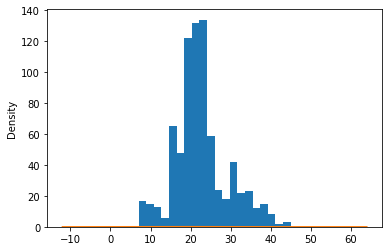

In [48]:
md_df['Age'].plot.hist(bins = 20)


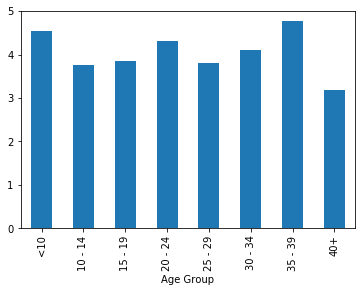

In [50]:
pba_df['Sales by Group Per Person'].plot.bar()

In [52]:
top_shop_df.describe()

,Total Purchases,Purchases,Avg Purchase Price
count,576.000000,576.000000,576.000000
mean,4.127240,1.352431,3.046374
std,2.398957,0.623394,1.069492
min,1.000000,1.000000,1.000000
25%,2.450000,1.000000,2.152500
50%,3.720000,1.000000,3.090000
75%,4.902500,2.000000,3.864375
max,18.960000,5.000000,4.990000
